<a href="https://colab.research.google.com/github/Hamid-Mofidi/Python_for_Deep_Learning/blob/main/Python_Intro/Pyth_intro_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch


In [ ]:
# Sampling

# create a list of numbers

x = [ 1, 2, 4, 6 , 5, 4, 0, -4, 5, -2, 6, 10, -9, 1, 3, -6 ]
n = len(x)

# compute the population mean
popmean = np.mean(x)

# compute a sample mean
sample   = np.random.choice(x, size=5, replace=True)
sampmean = np.mean(sample)

# print
print('Popmean:', popmean)
print('Sample mean:', sampmean)

Popmean: 1.625
Sample mean: 0.4


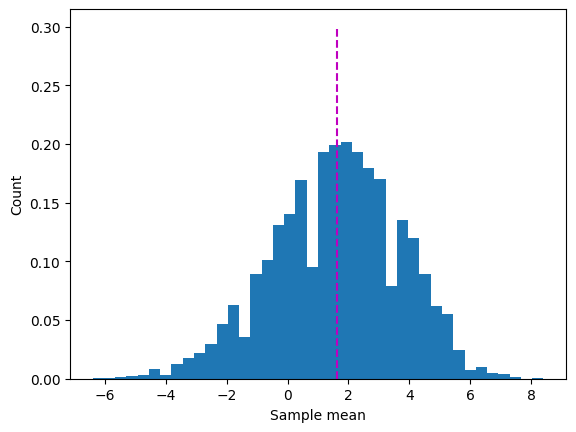

In [ ]:
# Sampling with large data

x = [ 1, 2, 4, 6 , 5, 4, 0, -4, 5, -2, 6, 10, -9, 1, 3, -6 ]
nExpers = 10000
samplemeans =  np.zeros(nExpers)
for i in range(nExpers):
  # step 1: draw a sample
  sample  = np.random.choice(x,size=5,replace=True)
  # step 2: compute its mean
  samplemeans[i] = np.mean(sample)
# show the results as a histogram
plt.hist(samplemeans, bins=40, density=True)
plt.plot([popmean, popmean], [0, .3], 'm--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()

In [ ]:
# Reproducible randomness via seeding
print(np.random.randn(5))


[-0.9822943   1.03126909  0.49133378 -0.4466466  -0.80636008]


In [ ]:
# Old method: 
# repeating after fixing the seed (old, but still widely used method)
np.random.seed(17)
print(np.random.randn(5))
print(np.random.randn(5))

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]


In [ ]:
# New seed mechanism in numpy:

randseed1 = np.random.RandomState(17)
randseed2 = np.random.RandomState(20230517) #today date

print( randseed1.randn(5) )  # same sequence
print( randseed2.randn(5) )  # diff from above, but same each time
print( randseed1.randn(5) )  # same as two up
print( randseed2.randn(5) )  # same as two up

print( np.random.randn(5) )  # different every time


[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[ 1.02702576  0.61838581 -0.10170194  0.66414977  1.08452752]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[-0.03054951 -0.73697171 -1.24036263 -0.8974199  -0.40873964]
[ 0.13126776 -1.21256024  0.15999085 -0.75522304  0.34989599]


In [ ]:
# Using PyTorch

torch.randn(5)

tensor([ 1.5836, -1.8780, -0.2505,  0.3454,  0.9513])

In [ ]:
torch.manual_seed(22)
print(torch.randn(5))

# torch's seed does not spread to numpy
print(np.random.randn(5))

tensor([ 1.0302, -0.5073, -0.1017,  1.3587, -3.0745])
[-1.15541329  3.34515739  0.12672721 -0.6941789   0.55767443]


A **t-test** is a statistical test used in deep learning to determine whether **there is a significant difference between the means of two datasets**. It is commonly used in hypothesis testing and can be used to compare the performance of two different machine learning models or algorithms.

In deep learning, t-tests are often used to evaluate the statistical significance of the difference between the mean values of the performance metrics, such as accuracy or loss, of two models or algorithms. This helps to determine whether one model or algorithm is significantly better than the other.

The t-test assumes that the data is normally distributed and that the variances of the two datasets are equal. If these assumptions are not met, alternative tests such as the **Welch's t-test or the Mann-Whitney U test** may be used instead.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Generate two datasets
data1 = np.random.normal(0, 1, 100) #  is a NumPy function that generates an 
      # array of 100 random numbers sampled from a normal distribution 
      # with mean 0 and standard deviation 1.
data2 = np.random.normal(1, 1, 100) # is similar to the data1 function, 
                                    # but with a mean of 1 instead of 0.

# Perform t-test
t_statistic, p_value = ttest_ind(data1, data2)
# "t_statistic" is the calculated t-statistic for the two samples.
# "p_value" is the calculated p-value for the two samples.

# The t-statistic is a measure of the difference between the means of the 
# two samples, while the p-value is a measure of the probability of 
# observing such a difference by chance.

# If the p-value is less than a chosen significance level (e.g. 0.05), 
# then it is usually concluded that the two samples are significantly different. 
# If the p-value is greater than the significance level, then there is not 
# enough evidence to conclude that the two samples are significantly different.

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -8.330839622717063
p-value: 1.3193907304458805e-14


In above example, note that we cannot determine which dataset is better based on the t-statistic and p-value alone. We need to look at the actual values of the performance metric to make that determination.

Here's another example that shows how to use a t-test to determine if one dataset is better than the other:

Suppose we have two models, model1 and model2, and we want to compare their accuracy on a classification task using a t-test. We have 100 test samples for each model, and we record their accuracies in two arrays, acc1 and acc2.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Generate two arrays of accuracies
acc1 = np.random.normal(0.8, 0.1, 100)
acc2 = np.random.normal(0.85, 0.1, 100)

# Perform t-test
t_statistic, p_value = ttest_ind(acc1, acc2)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Determine which model is better
if p_value < 0.05:
    if np.mean(acc1) > np.mean(acc2):
        print("Model 1 is significantly better than Model 2")
    else:
        print("Model 2 is significantly better than Model 1")
else:
    print("There is no significant difference between the models")

    

t-statistic: -3.6317797333753594
p-value: 0.00035848154546633563
Model 2 is significantly better than Model 1


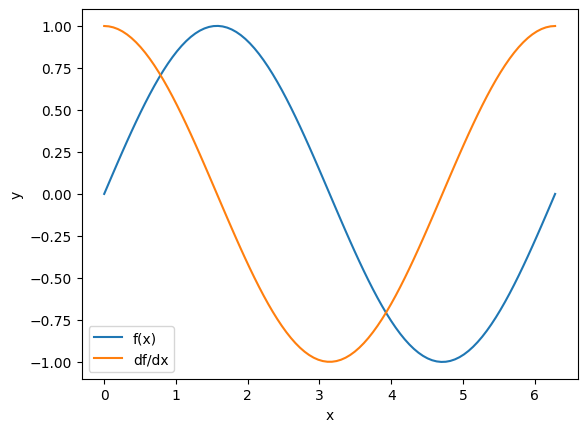

In [ ]:
# here's a simple example of how to plot the derivative of a function 
# in Python using the numpy and matplotlib libraries:

import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot
def f(x):
    return np.sin(x)

# Define the range of x values
x = np.linspace(0, 2*np.pi, 100)

# Plot the function
plt.plot(x, f(x), label='f(x)')

# Plot the derivative
plt.plot(x, np.gradient(f(x), x), label='df/dx')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()




In above example, we define a simple function f(x) = sin(x) and create an array of x values using the numpy linspace() function. We then plot the function using plt.plot() and label it as f(x).

To plot the derivative of the function, we use the numpy gradient() function to calculate the numerical derivative of f(x) with respect to x. We then plot the derivative on the same graph and label it as df/dx.

Finally, we add labels to the axes and a legend to distinguish between the two plots. We then use plt.show() to display the plot.

This code will generate a plot that shows both the original function and its derivative on the same graph. The derivative plot will be labeled as "df/dx".